In [1]:
# Re-importing necessary libraries since the environment was reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Parameters for the Weibull Distribution
scale = 6  # Mean persistency of 6 months (scale)
shape = 1.5  # Shape parameter for Weibull (this can be adjusted to fit different behaviors)
population_size_persistency = 10000  # Population size

# Simulate drug persistency using the Weibull Distribution
persistency_weibull = np.random.weibull(shape, population_size_persistency) * scale

# Truncate persistency values to zero (in case of extremely small simulated values)
persistency_weibull = np.maximum(persistency_weibull, 0)

# Summary statistics for Weibull Distribution
persistency_weibull_summary = pd.DataFrame(
    persistency_weibull, columns=['Persistency (Weibull)']
).describe()

# Calculate percentage of patients with persistency > 12 months
persistency_weibull_above_12 = (persistency_weibull > 12).mean() * 100
persistency_weibull_below_or_equal_12 = (persistency_weibull <= 12).mean() * 100

# Print summary statistics
print(persistency_weibull_summary)
print(f"Percentage of patients persisting > 12 months: {persistency_weibull_above_12:.2f}%")
print(f"Percentage of patients persisting ≤ 12 months: {persistency_weibull_below_or_equal_12:.2f}%")

       Persistency (Weibull)
count           10000.000000
mean                5.449192
std                 3.738938
min                 0.007141
25%                 2.634618
50%                 4.693057
75%                 7.496549
max                26.397538
Percentage of patients persisting > 12 months: 6.22%
Percentage of patients persisting ≤ 12 months: 93.78%


In [3]:
# Summary statistics
persistency_summary = pd.DataFrame(persistency_weibull, columns=['Persistency (Months)']).describe()

persistency_weibull_summary, persistency_weibull_above_12, persistency_weibull_below_or_equal_12


(       Persistency (Weibull)
 count           10000.000000
 mean                5.449192
 std                 3.738938
 min                 0.007141
 25%                 2.634618
 50%                 4.693057
 75%                 7.496549
 max                26.397538,
 6.22,
 93.78)

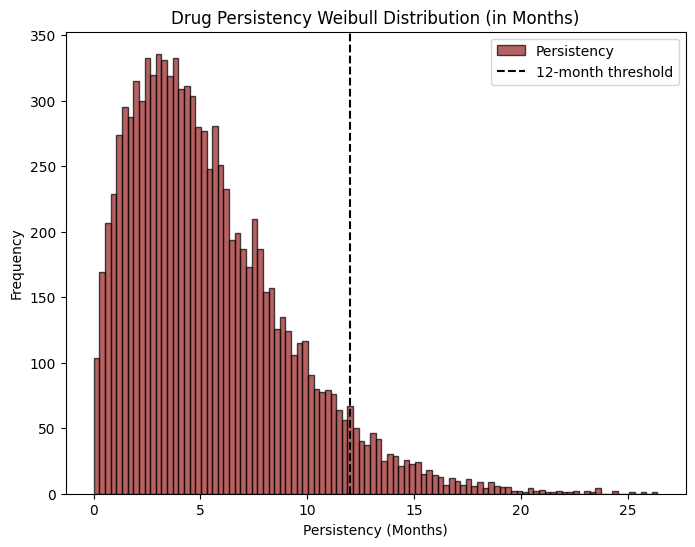

In [4]:
# Plotting the persistency distribution
plt.figure(figsize=(8, 6))
plt.hist(persistency_weibull , bins=100, alpha=0.7, edgecolor='black', label='Persistency', color='#992020')
plt.axvline(x=12, color='black', linestyle='--', label='12-month threshold')
plt.title('Drug Persistency Weibull Distribution (in Months)')
plt.xlabel('Persistency (Months)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

In [18]:
shape = 1.3  # Shape parameter for Weibull distribution (this can be adjusted)
population_size_persistency = 10000  # Population size
means_range = np.arange(3, 13.1, 0.1)  # Mean values from 3 to 13 in steps of 0.1
results = []

# Loop over the range of mean values
for mean in means_range:
    scale = mean  # Set scale to the current mean value
    # Simulate drug persistency using the Weibull Distribution
    persistency_weibull = np.random.weibull(shape, population_size_persistency) * scale

    # Truncate persistency values to zero (in case of extremely small simulated values)
    persistency_weibull = np.maximum(persistency_weibull, 0)

    # Calculate the percentage of patients with persistency > 12 months
    persistency_above_12 = (persistency_weibull > 12).mean() * 100
    
    # Save the results for plotting
    results.append({'Mean': mean, 'Percentage > 12 months': persistency_above_12})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)


In [19]:
results_df[results_df['Mean'] > 5.9]

,Mean,Percentage > 12 months
29,5.9,28.25
30,6.0,29.46
31,6.1,29.41
32,6.2,29.95
33,6.3,29.99
...,...,...
96,12.6,37.95
97,12.7,37.07
98,12.8,37.28
99,12.9,36.64


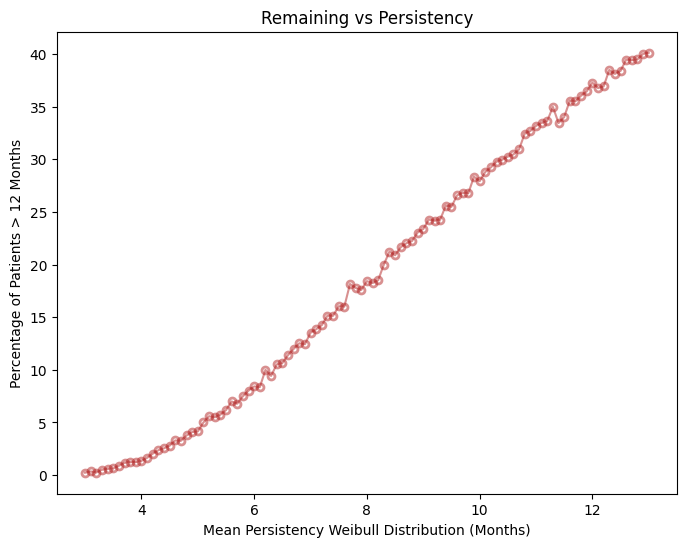

In [6]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(results_df['Mean'], results_df['Percentage > 12 months'], marker='o', color='firebrick',markersize=5,
         markerfacecolor='none', markeredgewidth=2, alpha=0.5)
plt.title('Remaining vs Persistency')
plt.xlabel('Mean Persistency Weibull Distribution (Months)')
plt.ylabel('Percentage of Patients > 12 Months')
plt.grid(False)
plt.show()

In [7]:
results_df[results_df['Mean'] > 5.9]

,Mean,Percentage > 12 months
29,5.9,8.02
30,6.0,8.42
31,6.1,8.35
32,6.2,9.99
33,6.3,9.42
...,...,...
96,12.6,39.47
97,12.7,39.41
98,12.8,39.49
99,12.9,40.01


In [8]:
results_df.to_csv('persistency_above_12_months_weibull.csv', index=False)


In [32]:
# Parameters
population_size_persistency = 10000  # Population size
means_range = np.arange(3, 13.1, 0.1)  # Mean values from 3 to 13 in steps of 0.1
shapes_range = np.linspace(2.0, 0.3, 30)  # Shape values from 2.3 to 0.3 in 30 steps
results = []

# Loop over the range of mean values
for mean in means_range:
    row = []  # Store the results for each mean
    for shape in shapes_range:
        scale = mean  # Set scale to the current mean value
        # Simulate drug persistency using the Weibull Distribution
        persistency_weibull = np.random.weibull(shape, population_size_persistency) * scale

        # Truncate persistency values to zero (in case of extremely small simulated values)
        persistency_weibull = np.maximum(persistency_weibull, 0)

        # Calculate the percentage of patients with persistency > 12 months
        persistency_above_12 = (persistency_weibull > 12).mean() * 100
        
        # Append the result for this mean and shape to the row
        row.append(persistency_above_12)
    
    # Add the row to the results
    results.append(row)

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=[f"Shape {shape:.2f}" for shape in shapes_range], index=[f"Mean {mean:.1f}" for mean in means_range])


In [33]:
results_df.filter(items = ['Mean 6.0'], axis=0)

,Shape 2.00,Shape 1.94,Shape 1.88,Shape 1.82,Shape 1.77,Shape 1.71,Shape 1.65,Shape 1.59,Shape 1.53,Shape 1.47,...,Shape 0.83,Shape 0.77,Shape 0.71,Shape 0.65,Shape 0.59,Shape 0.53,Shape 0.48,Shape 0.42,Shape 0.36,Shape 0.30
Mean 6.0,1.82,2.13,2.07,2.51,3.53,4.04,4.13,5.06,5.93,6.46,...,16.55,18.55,19.4,20.53,21.19,23.55,24.49,25.75,27.74,29.26


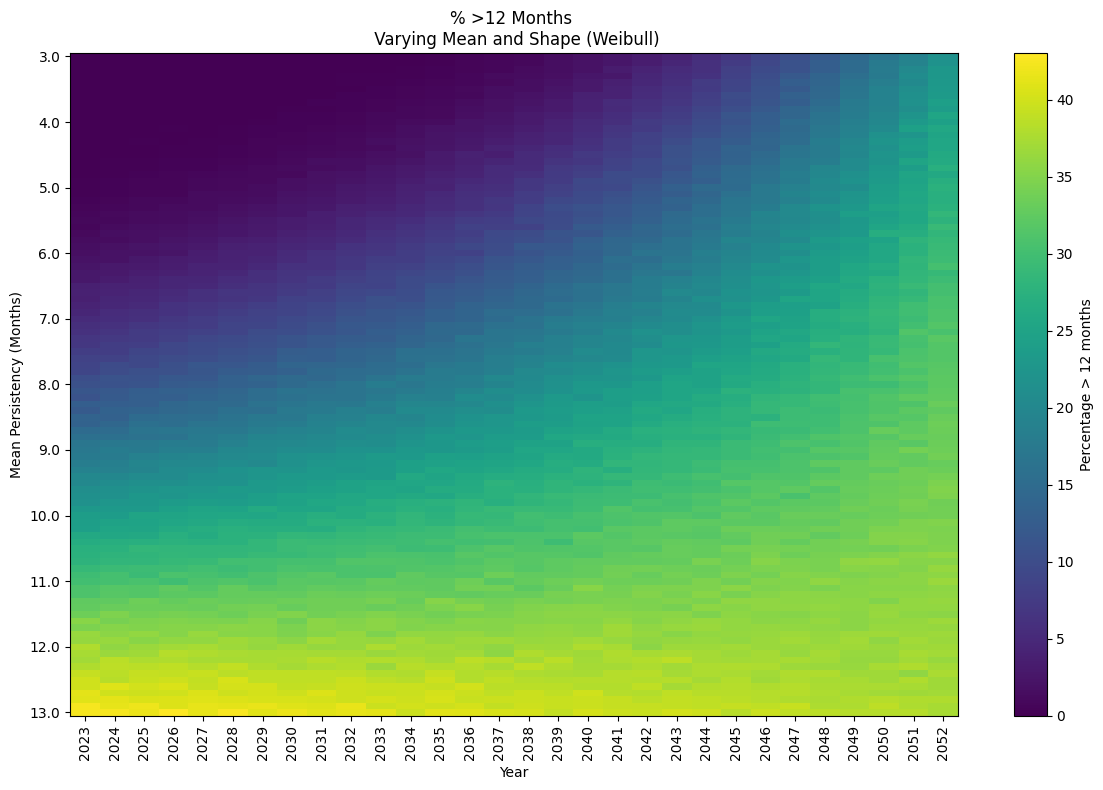

In [34]:
years_start = 2023
year_labels = [str(years_start + i) for i in range(len(shapes_range))]

plt.figure(figsize=(12, 8))
plt.imshow(results_df.values, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Percentage > 12 months')
plt.xlabel('Year')
plt.ylabel('Mean Persistency (Months)')
plt.title('% >12 Months \n Varying Mean and Shape (Weibull)')
plt.xticks(np.arange(len(shapes_range)), year_labels, rotation=90)  # Set custom year labels
y_ticks = np.arange(0, len(means_range), 10)  # Every 10th mean value
y_labels = [f"{means_range[i]:.1f}" for i in y_ticks]  # Labels corresponding to those ticks
plt.yticks(y_ticks, y_labels)
plt.tight_layout()
plt.show()

In [35]:
results_df.to_csv('persistency_above_12_months_weibull_per_year.csv')